## Interpolação e implicações

Documento criado com o objetivo de apresentar considerações sobre métodos de interpolação vistos na disciplina de matemática computacional (CAP-239-4), do curso de pós-graduação em Computação Aplicada do Instituto Nacional de Pesquisas Espaciais

Docentes:
- Dr. Leonardo B. L. Santos
- Dr. Reinaldo Rosa

Discente:
- Felipe Menino Carlos


In [1]:
addpath('src')

<hr>

### Testes dos métodos de interpolação

Durante a apresentação das aulas de interpolação, foi apresentado que o processo de interpolação pode ser realizado de diversas formas e que o polinômio de interpolação, em qualquer um desses métodos é único.

Dentro os métodos apresentados para a interpolação estão `Solução via Sistemas lineares` e `Método de Lagrange`. Sendo que, mesmo cada um desses métodos gerando resultados iguais é interessante entender as diferenças entre cada um deles. 

Começando com a `Solução via Sistemas Lineares`, este que é um método simples para a realização da interpolação, talvez sendo algo intuítivo quando pensamos na solução geométrica da interpolação.

Este método, apesar de sua simplicidade, apresenta problemas com as representações numéricas, podendo ter problemas com a precisão, principalmente quando a matriz possui diversos elementos.

Como alternativa a este método existe o `Método de Lagrange`, que computacionalmente menos custoso para a realização da aproximação do polinômio, porém pode ser custoso para a geração de valores com o polinômio.

Para mais comparações entre cada um dos métodos consulte [Interpolation using the Vandermonde matrix](http://pages.cs.wisc.edu/~sifakis/courses/cs412-s13/lecture_notes/CS412_12_Feb_2013.pdf)

<hr>

*Quando o método de interpolação está sendo determinado, o que está sendo escolhido é a maneira como o polinômio será representado para a aproximação de $P_n(x) = f(x)$*


Os testes abaixo são feitos para avaliar as características de cada uma das técnicas frente a diferentes conjuntos de dados

#### Teste dos métodos - 3 pontos

<hr>

Visualização dos pontos base

In [2]:
x = [-1 1 2];
y = [3 2 1];

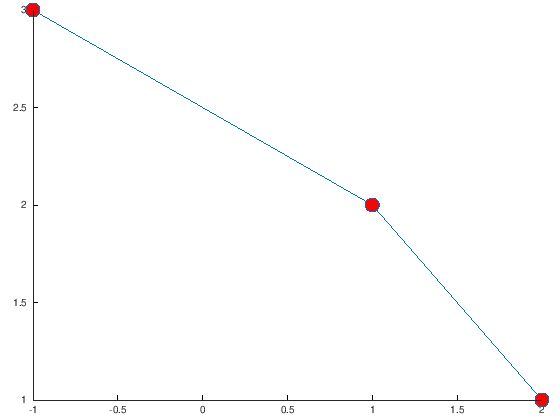

In [3]:
plotBasePoints(x, y)

**Interpolação pela solução de sistemas lineares**

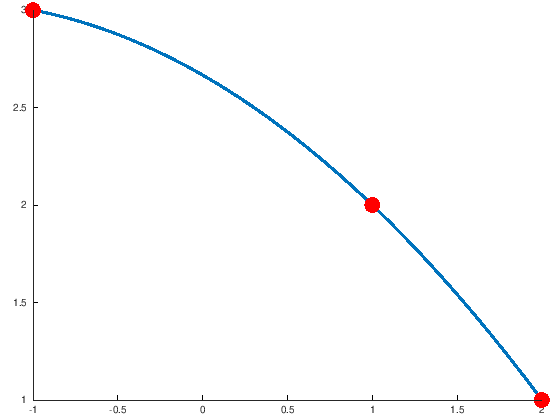

In [4]:
params = vander(x) \ y';
plotPoly(x, y, params, -1:0.1:2)

**Interpolação pelo método de Lagrange**

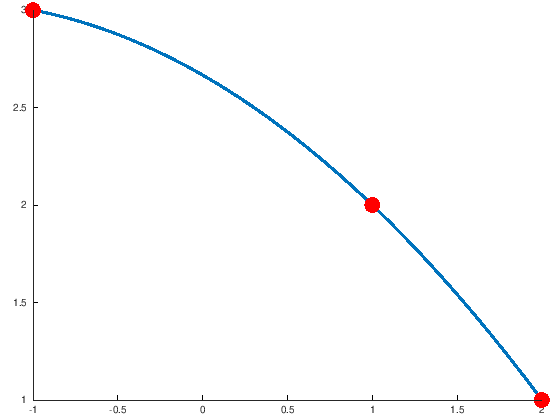

In [5]:
paramsLagrange = lagrangeVector(min(x):0.1:max(x), x, y);
plotPolyVector(x, y, paramsLagrange, min(x):0.1:max(x))

Para estes testes, os dois métodos apresentaram o mesmo polinômio interpolador.

#### Teste dos métodos - 8 pontos

<hr>

Visualização dos pontos base

In [6]:
x = [1 2 3 4 5 6 7 8];
y = [1 2 4 6 5 7 5 3];

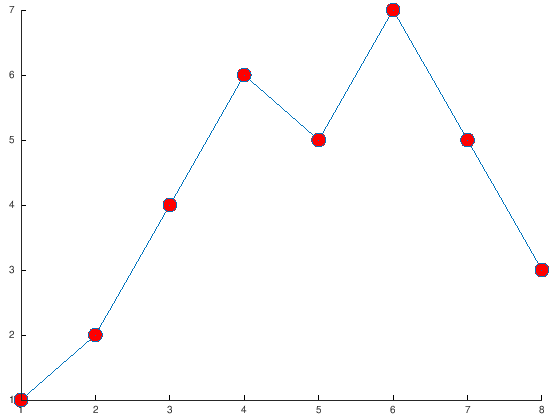

In [7]:
plotBasePoints(x, y)

**Interpolação pela solução de sistemas lineares**

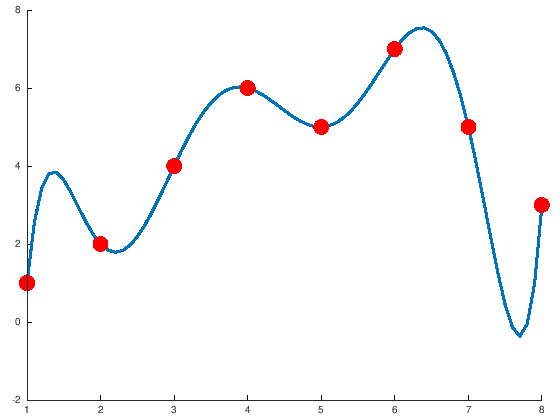

In [8]:
params = vander(x) \ y';
plotPoly(x, y, params, 1:0.1:8)

**Interpolação pelo método de Lagrange**

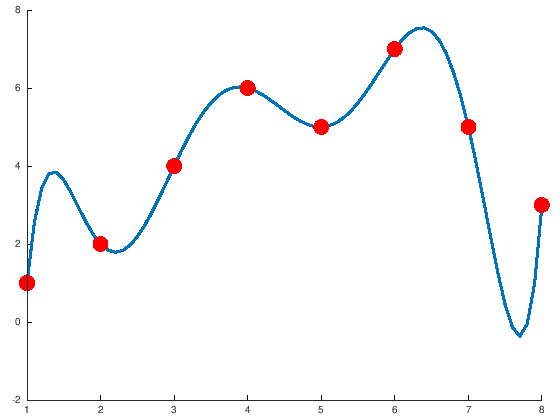

In [9]:
paramsLagrange = lagrangeVector(min(x):0.1:max(x), x, y);
plotPolyVector(x, y, paramsLagrange, min(x):0.1:max(x))

#### Teste dos métodos - 10 pontos

<hr>

Visualização dos pontos base

In [10]:
x = [0.93 3.31 2.59 6.23 8.33 8.09 9.81 11.114 12.47 13.69];
y = [0.8 1.46 3.48 4.44 5.3 6.4 7.14 9.72 10.16 12.49];

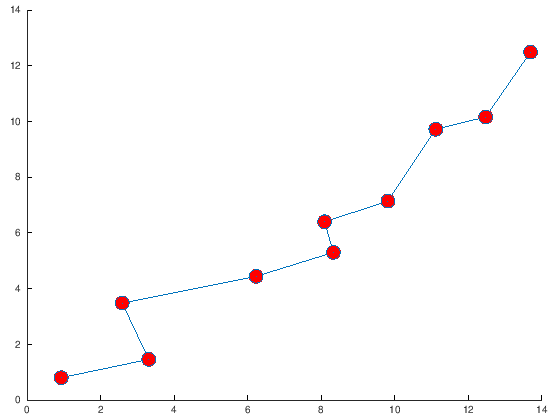

In [11]:
plotBasePoints(x, y)

**Interpolação pela solução de sistemas lineares**

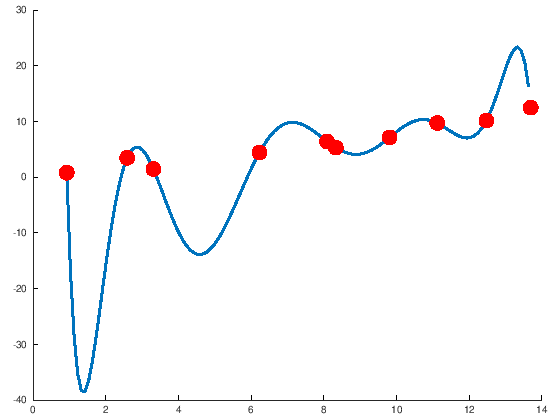

In [12]:
params = vander(x) \ y';
plotPoly(x, y, params, min(x):0.1:max(x));

**Interpolação pelo método de Lagrange**

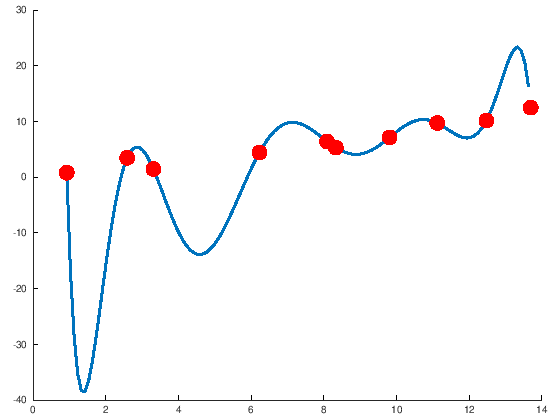

In [13]:
paramsLagrange = lagrangeVector(min(x):0.1:max(x), x, y);
plotPolyVector(x, y, paramsLagrange, min(x):0.1:max(x))

#### Teste dos métodos - 16 pontos

<hr>

Visualização dos pontos base

In [14]:
x = [1 2 3 4 5 6 7 8 13 15 17 22 25 31 33 34];
y = [1 2 4 6 5 7 5 3 8 10 12 11 8 15 17 7 ];

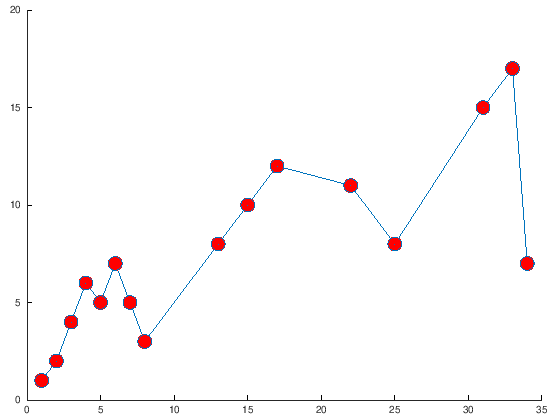

In [15]:
plotBasePoints(x, y)

**Interpolação pela solução de sistemas lineares**

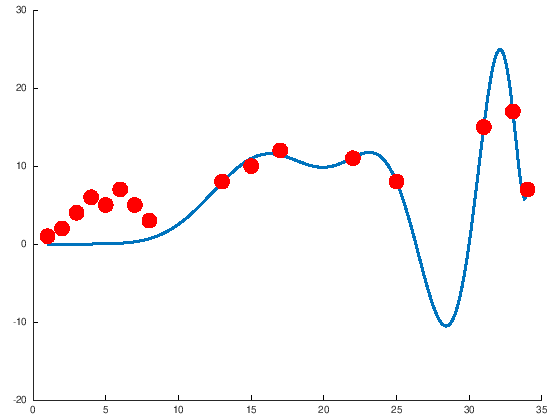

In [16]:
params = vander(x) \ y';
plotPoly(x, y, params, min(x):0.1:max(x))

**Interpolação pelo método de Lagrange**

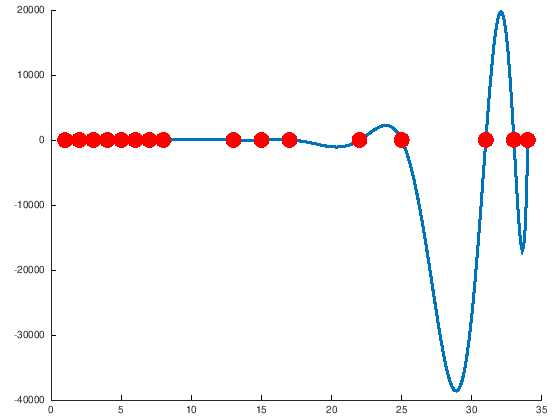

In [17]:
paramsLagrange = lagrangeVector(min(x):0.1:max(x), x, y);
plotPolyVector(x, y, paramsLagrange, min(x):0.1:max(x))

O comportamento apresentado neste teste é bastante interessante, isso já que os polinômios gerados pelos diferentes métodos foram diferentes, quando deveria ser iguais. Isso pode ser explicado por conta da instabilidade numérica de ambos os métodos, sendo para Lagrange o efeito do fenômeno de Runge e para o sistema linear, que além do fenômeno de Runge, pode ter sido influênciado por erros numéricos.

#### Teste dos métodos - 10 pontos

<hr>

Visualização dos pontos base

In [18]:
x = [1 2.53 3.07 4.29 6 7 8.67 8.91 10.79 11.79];
y = [1 0.9 2.16 1.38 2.66 2 3 2.1 3.52 2.74];

**Interpolação pela solução de sistemas lineares**

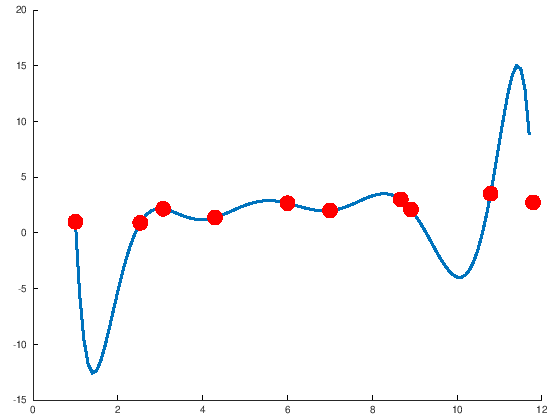

In [19]:
params = vander(x) \ y';
plotPoly(x, y, params, min(x):0.1:max(x))

**Interpolação pelo método de Lagrange**

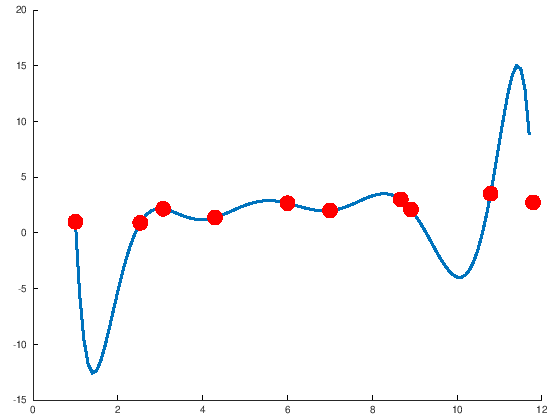

In [20]:
paramsLagrange = lagrangeVector(min(x):0.1:max(x), x, y);
plotPolyVector(x, y, paramsLagrange, min(x):0.1:max(x))

### Fenômeno de Runge

Quando pensamos intuitivamente sobre o processo de interpolação, podemos pensar que, dado um comportamento ou função, realizar sua interpolação melhora com o aumento da quantidade de pontos que estão sendo considerados.

O `Fenômeno de Runge` diz exatamente o contrário. Não se pode realizar tal afirmação, isto já que, para graus elevados de polinômios podem existir comportamentos que não são mapeados ou mesmo que não façam parte do objeto que está sendo representado pelo polinômio.

Como forma de deixar claro tal pensamento, abaixo há uma figura que apresenta tal comportamento.

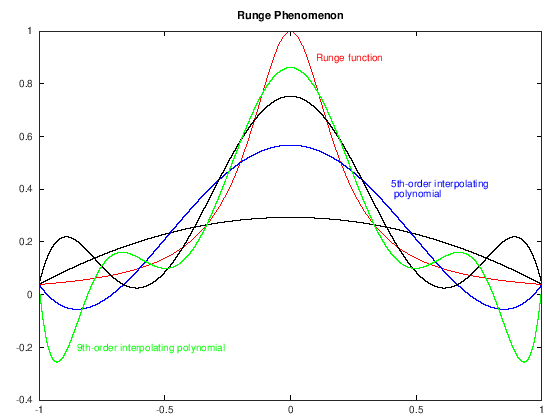

In [21]:
runge()

###### Referências

- https://www2.math.uconn.edu/~leykekhman/courses/MATH3795/Lectures/Lecture_14_poly_interp.pdf

- http://www.maths.lth.se/na/courses/FMN050/media/material/Interpolation.pdf

- http://www.cs.utexas.edu/~msbrenan/math/lecture13.html

- http://pages.cs.wisc.edu/~sifakis/courses/cs412-s13/lecture_notes/CS412_12_Feb_2013.pdf

- https://www.ime.unicamp.br/~valle/Teaching/MS211/Aula17.pdf

- http://www.maths.lth.se/na/courses/NUM121/NUM121-04/Lecture_Notes2.pdf

- http://home.iitk.ac.in/~pranab/ESO208/rajesh/03-04/ch6.pdf

- http://pages.cs.wisc.edu/~amos/412/lecture-notes/lecture06.pdf

- http://www.farrell.de/files/Numerics.pdf